# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549325066.85


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 10
max_edges = 80000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 80000 edges out of 229338 available (34.88% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,8372.000000,8372,8372,8371,8275,8289,0.0,701,8059,7955,7955,5985,3058,1108,182,15,0.0,0.0,0.0,8292,8292,8287,8372.0,8372.000000,8372.000000,8372.000000,8372.000000,8372.000000,8372.000000,8372.000000,8372.00000,8372.000000,8.372000e+03,8.372000e+03,8372.000000,8372.000000
unique,NaN,8183,8372,5642,11,672,NaN,526,1,1,28,219,425,282,66,7,NaN,NaN,NaN,8292,8292,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/8580332990/,Vários Autores (Autor),Capa comum,Companhia das Letras,NaN,1 de janeiro de 2014,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,Matemática,Faculdade,Probabilidade e Estatística,Neurociência,NaN,NaN,NaN,8525431494,978-8582600481,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,1,92,7051,500,NaN,11,8059,7955,1431,858,165,68,18,4,NaN,NaN,NaN,1,1,7273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4714.847707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,74.187919,34784.468080,356.584875,14.629810,4.446607,15.271752,22.256268,2.09412,426.373763,2.119722e+09,2.899170e-03,15.072623,0.001073
std,2831.610796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,151.726879,46687.261811,254.518316,33.645471,0.553749,2.582228,2.585345,1.22055,201.718377,1.238697e+09,1.043685e-02,26.216953,0.002638
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.900000,3.000000,2.000000,1.000000,1.000000,0.800000,8.600000,0.20000,4.500000,2.291770e+05,8.833086e-10,1.000000,0.000000
25%,2275.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26.527500,7863.500000,200.000000,2.000000,4.400000,13.600000,20.800000,1.30000,281.000000,1.030629e+09,3.306274e-05,2.000000,0.000055
50%,4606.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,39.530000,21632.000000,304.000000,9.000000,4.448313,15.304564,22.600000,1.80000,427.159494,2.112493e+09,2.063999e-04,5.000000,0.000301
75%,7182.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,63.992500,42982.750000,439.250000,14.539592,4.800000,16.000000,23.200000,2.60000,522.000000,3.177488e+09,1.184216e-03,16.000000,0.000931


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.000124,19,0.001342
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.000306,62,0.001589
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,14.539592,4.448313,14.4,20.8,0.8,200.0,1260550007,0.000224,59,0.004042
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.000060,18,0.000901
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.000408,88,0.003890
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.000299,43,0.002048
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,14.539592,4.448313,13.7,21.5,0.8,159.0,744636978,0.000040,9,0.001401
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.000112,10,0.001812
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,14.539592,4.448313,13.6,20.3,2.3,522.0,1246026773,0.000108,23,0.000591
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.199952221691
Train features shape:  (6698, 7361)
Train target shape:  (6698,)
Test features shape:  (1674, 7361)
Test target shape:  (1674,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 74.5717841146611
Median parice; R$ 39.5


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.3448952442096852
RF relative abs std:  0.013123344406778207
Baseline (average) relative mean:  1.3912067933278107
Baseline (average) relative std:  0.054337414383775914
Baseline (median) relative mean:  0.5937590168122808
Baseline (median) relative std:  0.026416990800124045
=== Absolute
RF abs mean:  24.81353232693037
RF abs std:  2.03379954427043
Baseline (average) mean:  61.722391950134764
Baseline (average) std:  4.703982789776496
Baseline (median) mean:  48.77690777948821
Baseline (median) std:  4.658830167806767


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,pages,21.720252,3.332699,0.153437
1,language_Inglês,17.906832,1.296645,0.072411
2,category2_Inglês e Outras Línguas,11.475215,2.254777,0.196491
3,publisher_Cengage Learning,6.400923,4.510754,0.704704
4,width,4.698992,1.614601,0.343606
5,height,4.507741,0.709095,0.157306
6,ranking,3.931602,0.630574,0.160386
7,eigenvector_centrality,3.282784,0.734991,0.223893
8,coverType_Capa dura,2.784289,1.432350,0.514440
9,publisher_McGraw-Hill Science/Engineering/Math,2.704899,1.874273,0.692918


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [670, 670, 670, 670, 670, 670, 670, 670, 669, 669]
X shape:  (6698, 7361)
y shape:  (6698,)


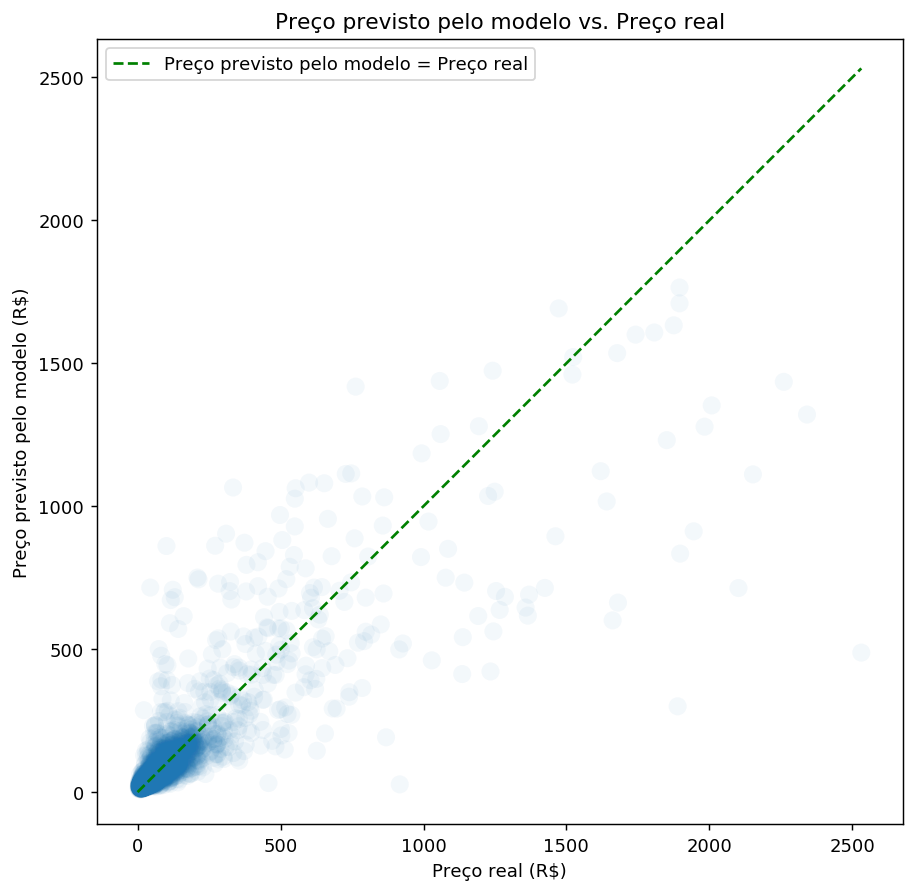

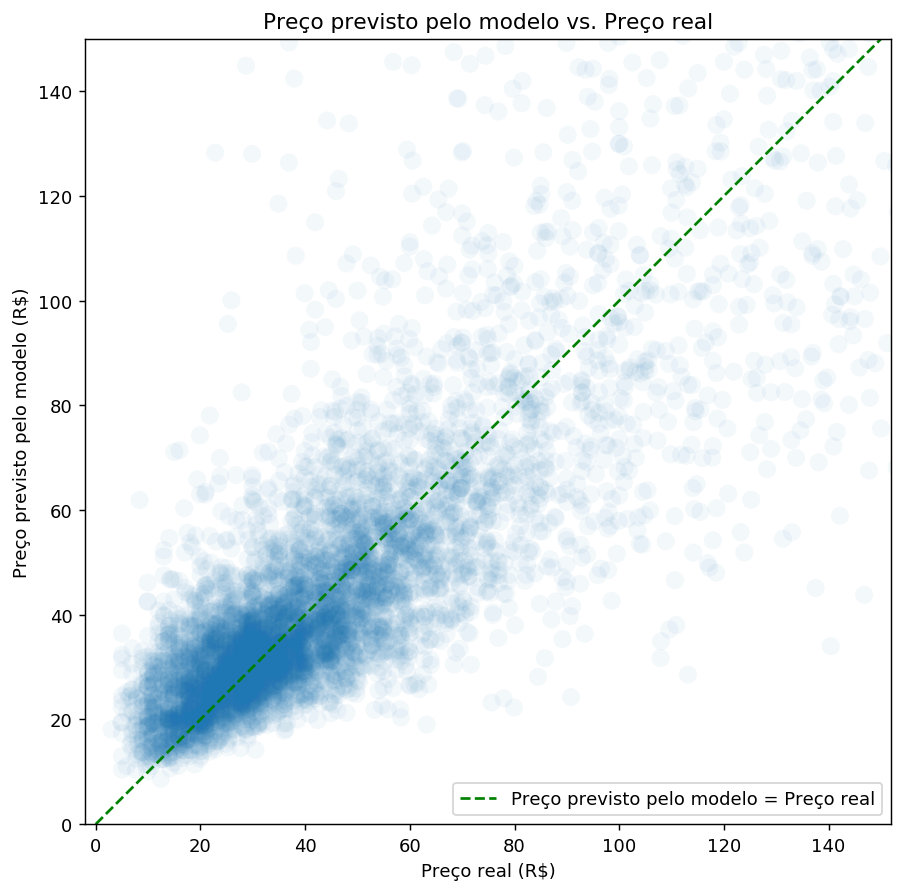

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 24.81)
('Std prediction error: R$', 77.99)
('Mean absolute error using average: R$', 61.72)
('Std prediction error using average: R$', 144.36)
('Mean absolute error using median: R$', 48.78)
('Std prediction error using median: R$', 153.3)
== Relative
('Mean relative absolute prediction error: ', 0.34)
('Std relative prediction error: ', 0.53)
('Mean relative absolute error using average: ', 1.39)
('Std relative prediction error using average: ', 1.53)
('Mean absolute error using median: R$', 0.59)
('Std prediction error using median: R$', 0.68)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 40.0, 0.000183290746322, 0.00065...",2043.198,2456.498216,2491.57,0.984394,0.970537,0.807247,487.872,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,35816.788379,345.000000,14.539592,4.448313,16.000000,23.100000,2.500000,427.159494,0.000183,40,0.000659
9.158984e+07,"[91589843.0, 46.0, 0.000157229490335, 0.000798...",1588.773,1814.188216,1849.26,0.979087,0.960518,0.841173,299.987,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,14.539592,4.448313,21.000000,26.000000,3.200000,427.159494,0.000157,46,0.000799
1.144179e+09,"[1144179495.0, 39.0, 8.64918795012e-05, 0.0009...",1387.930,2026.968216,2062.04,0.981204,0.964516,0.660435,713.610,2101.54,1991,Machine Learning,https://www.amazon.com.br/dp/0070428077/,"Tom M. Mitchell (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070428077,978-0070428072,Inglês,1,2101.54,35816.788379,432.000000,14.539592,4.448313,16.800000,24.100000,3.300000,921.000000,0.000086,39,0.000915
2.337783e+08,"[233778327.0, 14.0, 1.55817050572e-05, 0.00031...",1063.519,1822.998216,1858.07,0.979184,0.960701,0.560464,834.051,1897.57,2184,Biochemistry,https://www.amazon.com.br/dp/0470570954/,"Donald Voet (Autor),",Capa dura,John Wiley & Sons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0121822117,978-0470570951,Inglês,1,1897.57,35816.788379,1428.000000,14.539592,4.448313,22.400000,27.700000,5.600000,427.159494,0.000016,14,0.000317
1.895458e+09,"[1895458154.0, 28.0, 0.000125499682969, 0.0004...",1060.872,1586.908216,1621.98,0.976226,0.955117,0.638510,600.608,1661.48,1897,A Transition to Advanced Mathematics,https://www.amazon.com.br/dp/1285463269/,"Douglas Smith (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285463269,978-1285463261,Inglês,1,1661.48,35816.788379,448.000000,14.539592,4.448313,19.000000,23.500000,1.900000,748.000000,0.000125,28,0.000404
7.945218e+08,"[794521798.0, 17.0, 9.63706124268e-06, 0.00024...",1040.988,2077.598216,2112.67,0.981646,0.965350,0.483692,1111.182,2152.17,2199,Introduction to Chemical Engineering Thermodyn...,https://www.amazon.com.br/dp/1259696529/,J.M. Smith Termodinamica en ingenieria quimica...,Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259696529,978-1259696527,Inglês,1,2152.17,35816.788379,768.000000,14.539592,4.448313,18.500000,23.900000,3.300000,427.159494,0.000010,17,0.000243
4.036193e+09,"[4036192844.0, 1.0, 1.5160102788e-06, 0.0, 217...",1032.915,1870.348216,1905.42,0.979691,0.961658,0.531084,912.005,1944.92,6610,Microeconomic Theory: Basic Principles and Ext...,https://www.amazon.com.br/dp/1305505794/,"Walter Nicholson (Autor),",Capa dura,Cengage Learning,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Administração, Negócios e Economia",Economia,Microeconomia,NaN,NaN,NaN,NaN,NaN,1305505794,978-1305505797,Inglês,1,1944.92,217838.000000,784.000000,14.539592,4.448313,21.000000,26.000000,

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.548407e+09,"[3548407309.0, 2.0, 1.19328116687e-05, 6.89498...",671.054,30.281784,4.79,0.108151,0.683716,15.151366,715.344,44.29,9183,The Complete Fiction of H. P. Lovecraft,https://www.amazon.com.br/dp/0785834206/,H. P. Lovecraft (Autor),Capa dura,Chartwell Books,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Literatura e Ficção,Ficção,NaN,NaN,NaN,NaN,NaN,NaN,0785834206,978-0785834205,Inglês,1,44.29,15302.000000,1112.0,7.000000,5.000000,17.800000,25.400000,5.100000,427.159494,1.193281e-05,2,0.000069
4.047607e+09,"[4047607377.0, 1.0, 0.000931793607976, 0.0, 67...",264.408,52.501784,17.43,0.789760,2.378876,11.980426,286.478,22.07,9312,How to Win Friends & Influence People (Miniatu...,https://www.amazon.com.br/dp/0762462019/,Dale Carnegie (Autor),Capa dura,Running Press Miniature Editions,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Administração, Negócios e Economia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0762462019,978-0762462018,Inglês,1,22.07,67771.000000,136.0,1.000000,1.000000,7.300000,8.600000,1.600000,68.000000,9.317936e-04,1,0.000000
1.029516e+09,"[1029516329.0, 20.0, 0.000112670185225, 0.0003...",759.608,26.418216,61.49,0.608872,0.261592,7.521616,860.598,100.99,1894,Partial Differential Equations of Mathematical...,https://www.amazon.com.br/dp/0486688895/,"Ronald B. Guenther (Autor),",Capa comum,Dover Publications Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0486688895,978-0486688893,Inglês,1,100.99,35816.788379,592.0,14.539592,4.448313,16.600000,23.400000,2.700000,748.000000,1.126702e-04,20,0.000335
2.764867e+09,"[2764867435.0, 1.0, 6.90485347264e-05, 0.0, 13...",53.530,66.191784,31.12,3.713604,7.898781,6.387828,61.910,8.38,5112,Os Filhos do Imperador,https://www.amazon.com.br/dp/8520920594/,Claire Messud (Autor),Capa comum,Nova Fronteira,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520920594,978-8520920596,Português,1,8.38,132168.000000,480.0,14.539592,4.448313,15.500000,22.600000,2.500000,358.000000,6.904853e-05,1,0.000000
1.790101e+09,"[1790101457.0, 3.0, 0.00204629514253, 0.000115...",31.426,69.571784,34.50,6.900000,13.914357,6.285200,36.426,5.00,3579,Baudolino,https://www.amazon.com.br/dp/8577990028/,Umberto Eco (Autor),Capa comum,Best Seller,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8577990028,978-8577990023,Português,1,5.00,35903.000000,602.0,15.000000,4.300000,11.800000,17.800000,2.200000,458.000000,2.046295e-03,3,0.000115
2.500409e+09,"[2500408971.0, 5.0, 7.8043415813e-05, 0.001149...",426.305,0.731784,34.34,0.465060,0.009910,5.773361,500.145,73.84,4513,"Tools of Titans: The Tactics, Routines, and Ha...",https://www.amazon.com.br/dp/1328683788/,"Timothy Ferriss (Autor),",Capa dura,Houghton Mifflin Harcourt,NaN,6 de dezembro de 2016,Livros,Livros,Inglês e Outras Línguas,Autoajuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328683788,978-1328683786,Inglês,1,73.84,19820.000000,736.0,8.000000,4.400000,17.800000,22.900000,0.200000,427.159494,7.804342e-05,5,0.001149
4.134595e+09,"[4134594725.0, 3.0, 0.000462489155583, 0.00017...",27.383,69.571784,34.50,6.900000,13.914357,5.476600,32.383,5.00,6275,Quem é Você Alasca? O Primeiro Amigo A Primeir...,https://www.amazon.com.br/dp/8578273427/,John Green (Autor),Capa comum,WMF Martins Fontes,NaN,NaN,Livros,Livros,Literatura e Ficção,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8578273427,978-8578273422,Português,1,5.00,12112.000000,240.0,38.000000,4.300000,14.000000,20.600000,1.800000,249.000000,4.624892e-04,3,0.000172
4.254723e+09,"[

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.837929e+09,"[1837929164.0, 7.0, 0.000140638499932, 0.00049...",0.008,53.671784,18.60,0.889952,2.568028,0.000383,20.892,20.90,6908,Pense Simples,https://www.amazon.com.br/dp/8545201451/,Gustavo Caetano (Autor),Capa comum,Gente,NaN,NaN,Livros,Livros,"Administração, Negócios e Economia",Carreiras,Guides,NaN,NaN,NaN,NaN,NaN,NaN,8545201451,978-8545201458,Português,1,20.90,1251.0,184.0,75.000000,4.500000,15.6,22.8,1.4,259.000000,0.000141,7,0.000500
2.437574e+09,"[2437574119.0, 5.0, 0.00143011039384, 0.000122...",0.010,47.671784,12.60,0.468401,1.772185,0.000372,26.910,26.90,4841,O lar da srta. Peregrine para crianças peculiares,https://www.amazon.com.br/dp/8551000683/,Ransom Riggs (Autor),Capa dura,Intrínseca,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Infantojuvenil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8551000683,978-8551000687,Português,1,26.90,5487.0,352.0,418.000000,4.400000,16.0,23.6,2.2,612.000000,0.001430,5,0.000123
3.599664e+09,"[3599664121.0, 9.0, 0.00298221504283, 0.000130...",0.014,35.281784,0.21,0.005345,0.897984,0.000356,39.276,39.29,4441,Origens da Fundação,https://www.amazon.com.br/dp/8576571765/,Isaac Asimov (Autor),Capa comum,Aleph,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Ficção Científica,Aventura,NaN,NaN,NaN,NaN,NaN,NaN,8576571765,978-8576571766,Português,1,39.29,4486.0,408.0,9.000000,4.500000,16.0,22.6,2.4,640.000000,0.002982,9,0.000131
7.237915e+08,"[723791458.0, 1.0, 8.96186454058e-06, 0.0, 431...",0.014,45.541784,10.47,0.360661,1.568783,0.000482,29.044,29.03,5717,Esconda-Se,https://www.amazon.com.br/dp/8581633102/,Lisa Gardner (Autor),Capa comum,Novo Conceito,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Fantasia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8581633102,978-8581633107,Português,1,29.03,43188.0,400.0,43.000000,4.300000,15.6,23.2,2.8,358.000000,0.000009,1,0.000000
1.546931e+09,"[1546931111.0, 15.0, 5.99034688577e-06, 0.0010...",0.017,27.328216,62.40,0.612365,0.268187,0.000167,101.917,101.90,824,Descobrindo a Estatística Utilizando o SPSS,https://www.amazon.com.br/dp/8536319275/,Andy Field (Autor),Capa comum,Penso,NaN,NaN,Livros,Livros,Ciências,Educação,Pesquisa,NaN,NaN,NaN,NaN,NaN,NaN,8536319275,978-8536319278,Português,1,101.90,6506.0,688.0,7.000000,4.400000,17.6,24.6,3.8,427.159494,0.000006,15,0.001008
5.124837e+08,"[512483744.0, 1.0, 0.000887517774333, 0.0, 629...",0.020,45.311784,10.24,0.349966,1.548591,0.000684,29.280,29.26,4614,Hércules,https://www.amazon.com.br/dp/8578760360/,Menelaos Stephanides (Autor),Capa comum,Odysseus,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Mundial,Mitologia,NaN,NaN,NaN,NaN,NaN,NaN,8578760360,978-8578760366,Português,1,29.26,62966.0,154.0,1.000000,5.000000,13.8,20.8,1.2,240.000000,0.000888,1,0.000000
2.769218e+08,"[276921840.0, 29.0, 0.00149763204111, 0.003681...",0.022,24.451784,10.62,0.211891,0.487865,0.000439,50.098,50.12,2809,Economia e Sociedade na Grécia Antiga,https://www.amazon.com.br/dp/8578276809/,M. I. Finley (Autor),Capa comum,WMF Martins Fontes,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8578276809,978-8578276805,Português,1,50.12,27449.0,400.0,1.000000,4.000000,13.6,20.6,1.8,522.000000,0.001498,29,0.003682
2.279556e+08,"[227955641.0, 19.0, 2.78473351484e-05, 9.24612...",0.036,40.971784,5.90,0.175595,1.219398,0.001071,33.636,33.60,1482,Networks: A Very Short Introduction,https://www.amazon.com.br/dp/0199588074/,"Guido Caldarelli (Autor),",Capa comum,"Oxford University Press, USA"

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.837929e+09,"[1837929164.0, 7.0, 0.000140638499932, 0.00049...",0.008,53.671784,18.60,0.889952,2.568028,0.000383,20.892,20.90,6908,Pense Simples,https://www.amazon.com.br/dp/8545201451/,Gustavo Caetano (Autor),Capa comum,Gente,NaN,NaN,Livros,Livros,"Administração, Negócios e Economia",Carreiras,Guides,NaN,NaN,NaN,NaN,NaN,NaN,8545201451,978-8545201458,Português,1,20.90,1251.0,184.0,75.000000,4.500000,15.6,22.8,1.4,259.000000,0.000141,7,0.000500
2.437574e+09,"[2437574119.0, 5.0, 0.00143011039384, 0.000122...",0.010,47.671784,12.60,0.468401,1.772185,0.000372,26.910,26.90,4841,O lar da srta. Peregrine para crianças peculiares,https://www.amazon.com.br/dp/8551000683/,Ransom Riggs (Autor),Capa dura,Intrínseca,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Infantojuvenil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8551000683,978-8551000687,Português,1,26.90,5487.0,352.0,418.000000,4.400000,16.0,23.6,2.2,612.000000,0.001430,5,0.000123
3.599664e+09,"[3599664121.0, 9.0, 0.00298221504283, 0.000130...",0.014,35.281784,0.21,0.005345,0.897984,0.000356,39.276,39.29,4441,Origens da Fundação,https://www.amazon.com.br/dp/8576571765/,Isaac Asimov (Autor),Capa comum,Aleph,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Ficção Científica,Aventura,NaN,NaN,NaN,NaN,NaN,NaN,8576571765,978-8576571766,Português,1,39.29,4486.0,408.0,9.000000,4.500000,16.0,22.6,2.4,640.000000,0.002982,9,0.000131
7.237915e+08,"[723791458.0, 1.0, 8.96186454058e-06, 0.0, 431...",0.014,45.541784,10.47,0.360661,1.568783,0.000482,29.044,29.03,5717,Esconda-Se,https://www.amazon.com.br/dp/8581633102/,Lisa Gardner (Autor),Capa comum,Novo Conceito,NaN,NaN,Livros,Livros,"Fantasia, Horror e Ficção Científica",Fantasia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8581633102,978-8581633107,Português,1,29.03,43188.0,400.0,43.000000,4.300000,15.6,23.2,2.8,358.000000,0.000009,1,0.000000
1.546931e+09,"[1546931111.0, 15.0, 5.99034688577e-06, 0.0010...",0.017,27.328216,62.40,0.612365,0.268187,0.000167,101.917,101.90,824,Descobrindo a Estatística Utilizando o SPSS,https://www.amazon.com.br/dp/8536319275/,Andy Field (Autor),Capa comum,Penso,NaN,NaN,Livros,Livros,Ciências,Educação,Pesquisa,NaN,NaN,NaN,NaN,NaN,NaN,8536319275,978-8536319278,Português,1,101.90,6506.0,688.0,7.000000,4.400000,17.6,24.6,3.8,427.159494,0.000006,15,0.001008
5.124837e+08,"[512483744.0, 1.0, 0.000887517774333, 0.0, 629...",0.020,45.311784,10.24,0.349966,1.548591,0.000684,29.280,29.26,4614,Hércules,https://www.amazon.com.br/dp/8578760360/,Menelaos Stephanides (Autor),Capa comum,Odysseus,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Mundial,Mitologia,NaN,NaN,NaN,NaN,NaN,NaN,8578760360,978-8578760366,Português,1,29.26,62966.0,154.0,1.000000,5.000000,13.8,20.8,1.2,240.000000,0.000888,1,0.000000
2.769218e+08,"[276921840.0, 29.0, 0.00149763204111, 0.003681...",0.022,24.451784,10.62,0.211891,0.487865,0.000439,50.098,50.12,2809,Economia e Sociedade na Grécia Antiga,https://www.amazon.com.br/dp/8578276809/,M. I. Finley (Autor),Capa comum,WMF Martins Fontes,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8578276809,978-8578276805,Português,1,50.12,27449.0,400.0,1.000000,4.000000,13.6,20.6,1.8,522.000000,0.001498,29,0.003682
2.279556e+08,"[227955641.0, 19.0, 2.78473351484e-05, 9.24612...",0.036,40.971784,5.90,0.175595,1.219398,0.001071,33.636,33.60,1482,Networks: A Very Short Introduction,https://www.amazon.com.br/dp/0199588074/,"Guido Caldarelli (Autor),",Capa comum,"Oxford University Press, USA"

### Relative errors distribution

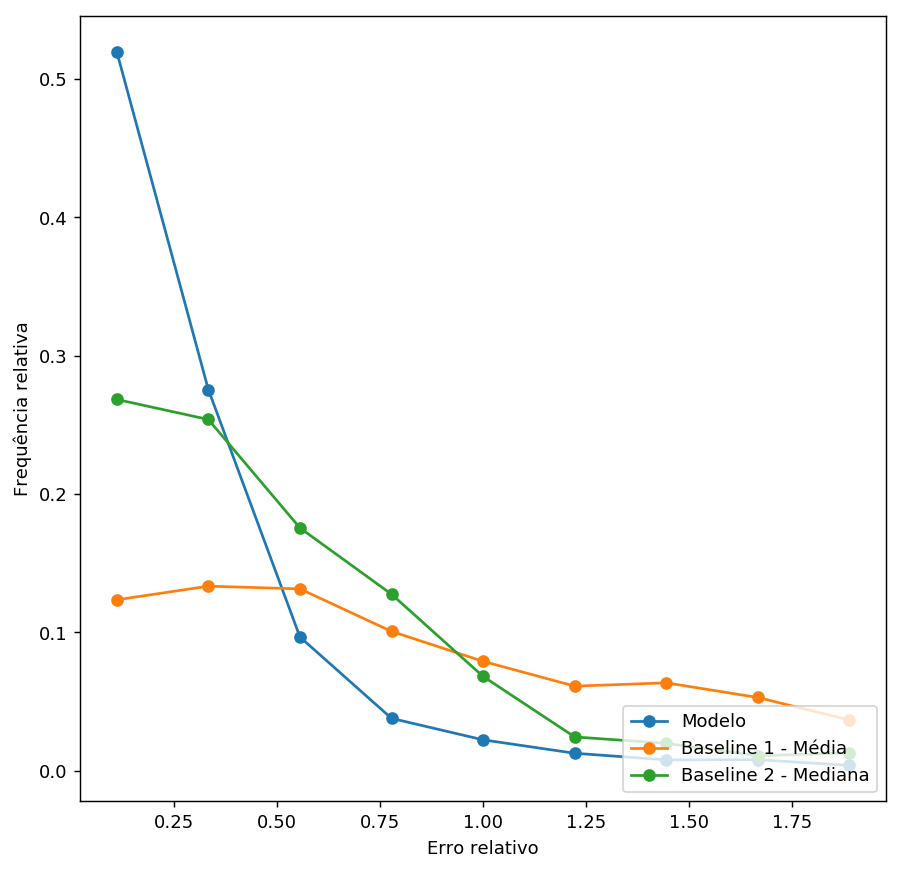

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

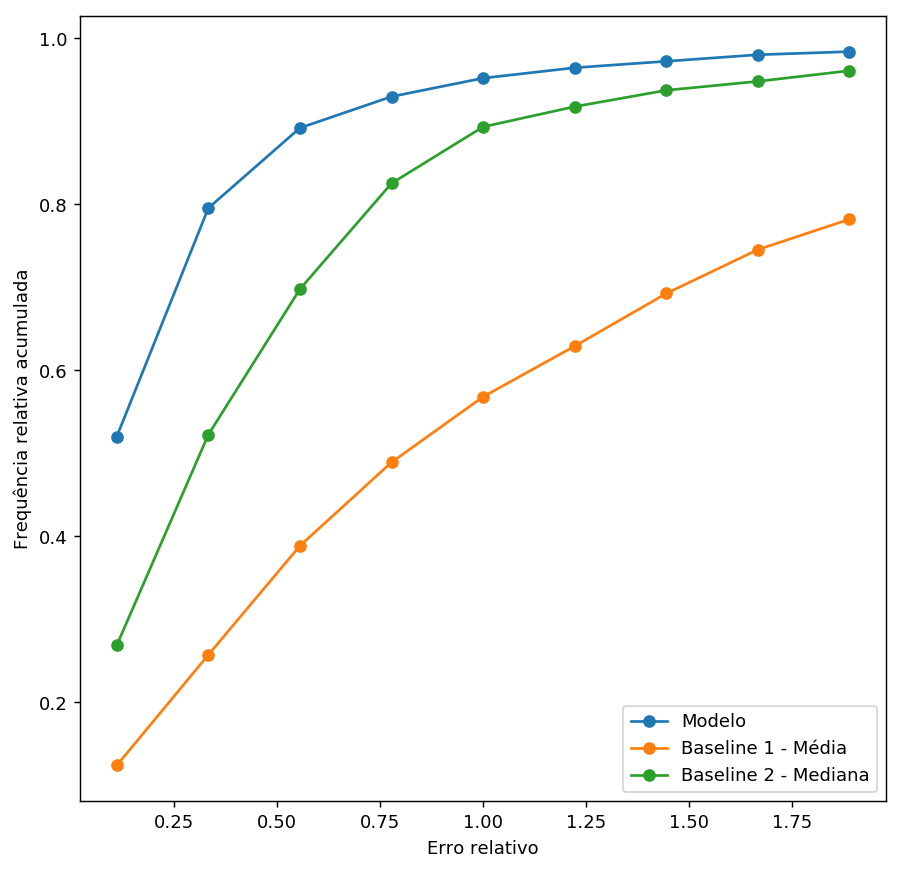

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,0.0,0.0,0.0,0.0,6698.0,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6698.000000,6.698000e+03,6698.000000,6698.000000
mean,24.813334,61.721817,48.776457,0.593763,1.391211,0.344899,72.362875,74.571784,4717.887280,NaN,NaN,NaN,NaN,1.0,74.571784,34797.147507,356.079768,14.940846,4.442802,15.271958,22.251273,2.090508,425.790827,2.935041e-03,15.193640,0.001087
std,77.999106,144.372155,153.310751,0.676537,1.527535,0.531068,130.729597,157.014237,2819.826779,NaN,NaN,NaN,NaN,0.0,157.014237,47085.087313,256.318990,33.098188,0.555630,2.561620,2.598094,1.220411,200.946787,1.075613e-02,26.988098,0.002721
min,0.008000,0.021784,0.000000,0.000000,0.000292,0.000167,8.664000,3.000000,2.000000,NaN,NaN,NaN,NaN,1.0,3.000000,3.000000,2.000000,1.000000,1.000000,0.800000,8.600000,0.200000,9.100000,8.833086e-10,1.000000,0.000000
25%,3.809000,26.246784,7.960000,0.205598,0.436421,0.100941,28.855250,26.522500,2306.250000,NaN,NaN,NaN,NaN,1.0,26.522500,7647.750000,200.000000,2.000000,4.400000,13.600000,20.800000,1.300000,281.000000,3.165010e-05,2.000000,0.000053
50%,8.563500,41.565000,16.115000,0.419587,0.917012,0.213072,38.699500,39.500000,4605.500000,NaN,NaN,NaN,NaN,1.0,39.500000,21443.500000,304.000000,10.000000,4.448313,15.400000,22.600000,1.800000,427.159494,2.028325e-04,5.000000,0.000298
75%,18.026250,53.371784,28.557500,0.744993,1.811642,0.392912,62.090500,63.790000,7167.250000,NaN,NaN,NaN,NaN,1.0,63.790000,43423.250000,432.000000,14.539592,4.900000,16.000000,23.200000,2.600000,522.000000,1.180392e-03,16.000000,0.000918
85%,28.058800,59.571784,52.804500,0.935593,2.552729,0.547708,89.639150,92.304500,8184.450000,NaN,NaN,NaN,NaN,1.0,92.304500,60636.050000,545.450000,14.539592,5.000000,17.000000,23.900000,3.000000,640.000000,2.999744e-03,28.000000,0.001683
90%,41.373400,64.581784,84.897000,1.195664,3.145180,0.702749,125.384500,124.397000,8713.300000,NaN,NaN,NaN,NaN,1.0,124.397000,76775.800000,631.300000,23.000000,5.000000,19.000000,25.300000,3.400000,721.000000,5.678326e-03,41.000000,0.002560
95%,78.095700,127.917216,162.989000,1.823445,4.330363,1.094929,193.866850,202.489000,9211.450000,NaN,NaN,NaN,NaN,1.0,202.489000,108845.350000,788.300000,47.150000,5.000000,20.800000,27.600000,4.100000,821.000000,1.523523e-02,63.000000,0.004742


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
280.981276989


<img src="files/image.png">